In [ ]:
!pip install requests

In [17]:
!pip list | grep requests

requests                  2.25.1
requests-html             0.10.0
requests-oauthlib         1.3.0


In [18]:
# HTTP 프로토콜을 통해서 웹 페이지의 정보를 가져오거나 추출, 삭제하기 위한 라이브러리
# GET, POST, PUT, DELETE 모두를 지원한다.
import requests

In [19]:
url = 'https://www.naver.com/'
r = requests.get(url)

In [20]:
r.status_code
# 200이 출력되었다면 성공적으로 가져왔다는 뜻이다.

200

In [21]:
#응답 헤더 출력하기
r.headers

{'Server': 'NWS', 'Date': 'Fri, 09 Dec 2022 13:21:04 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=9edf21404494b2f0cecccc0f4ca99f29050b7f9f2c98e656bd0b187a843adbf0; Expires=Sat, 10 Dec 2022 13:21:04 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
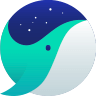
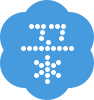

In [22]:
#텍스트 정보만 출력하고 싶다면 
r.text

# 웹사이트에서 날씨 정보 가져오기

In [23]:
from bs4 import BeautifulSoup

In [24]:
# 날씨 정보 가져오기
# 다음 포털에서의 날씨 정보에 대한 URL은 아래와 같다
location = '서울특별시 강남구 삼성동 날씨'
url = 'https://search.daum.net/search?w=tot&DA=Z8T&q=' + location + '&rtmaxcoll=Z8T'
html_weather = requests.get(url).text
soup = BeautifulSoup(html_weather, 'html.parser')

txt_temp = soup.select_one('div.info_temp').select_one('strong.txt_temp').text
txt_weather = soup.select_one('div.info_temp').select_one('span.txt_weather').text

print(txt_weather, txt_temp)

21시 현재, 맑음 6℃


In [28]:
print(txt_weather.split(',')[1].strip(), txt_temp)

맑음 6℃


# 주기적으로 웹사이트에서 정보를 가져오기

In [ ]:
!pip install schedule

In [29]:
import schedule
import time
from datetime import datetime

In [30]:
def load_weather():
    now = datetime.now()
    print('Current Time {:%H:%M:%S}'.format(now))
    
    location = '서울특별시 강남구 삼성동'
    url = 'https://search.daum.net/search?w=tot&DA=Z8T&q=' + location + ' 날씨&rtmaxcoll=Z8T'
    html_weather = requests.get(url).text
    soup = BeautifulSoup(html_weather, 'html.parser')
    txt_temp = soup.select_one('div.info_temp').select_one('strong.txt_temp').text
    txt_weather = soup.select_one('div.info_temp').select_one('span.txt_weather').text
    
    print(f'---- Today Weather ----')
    print(f'지역: {location}')
    print(f'기온: {txt_temp}')
    print(f'날씨: {txt_weather}')
    
schedule.every(10).seconds.do(load_weather)

# 만약 특정 시간에 작업을 하도록 하려면 아래와 같이 코드를 입력한다.
# 예: 매일 12시 정각에 실행하는 경우
# schedule.every().day.at("12:00").do(load_weather)

while(True):
    try:
        schedule.run_pending()
        time.sleep(1)
    except:
        print('강제 종료')
        schedule.clear()
        break

Current Time 22:35:35
---- Today Weather ----
지역: 서울특별시 강남구 삼성동
기온: 6℃
날씨: 21시 현재, 맑음
Current Time 22:35:46
---- Today Weather ----
지역: 서울특별시 강남구 삼성동
기온: 6℃
날씨: 21시 현재, 맑음
Current Time 22:35:56
---- Today Weather ----
지역: 서울특별시 강남구 삼성동
기온: 6℃
날씨: 21시 현재, 맑음
Current Time 22:36:07
강제 종료


# 네이버 뉴스 정보 가져오기

In [31]:
sort_val = '2' # 0: 관련도, 1: 최신, 2: 오래된 순

start_dt = '2022.11.01'
end_dt = '2022.11.30'
key = '코로나19'

address = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + key
address = address + "&sort=" + sort_val
address = address + "&photo=0&field=0&pd=3&ds=" + start_dt + "&de=" + end_dt
address = address + "&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked="
address = address + "&start="
             
print(address)

https://search.naver.com/search.naver?where=news&sm=tab_pge&query=코로나19&sort=2&photo=0&field=0&pd=3&ds=2022.11.01&de=2022.11.30&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&start=


## 해당 페이지 정보 가져오기

In [32]:
import pandas as pd

In [33]:
# 정보를 저장하기 위한 빈 데이터프레임 만들기
# 컬럼명: 언론사, 날짜, 제목, URL, 요약
df1 = pd.DataFrame(columns=['press', 'date', 'title', 'url', 'brief'])

for page in range(0, 10):
    try:
        raw = requests.get(address + str(page * 10 + 1), headers={'User-Agent':'Mozilla/5.0'})
        html = BeautifulSoup(raw.text, "html.parser")
        articles = html.select("ul.list_news > li")
                
        for ar in articles:            
            press = ar.select_one("a.info.press").text
            #press = press.replace('언론사 선정', '')
            title = ar.select_one("a.news_tit").text
            date =ar.select_one("span.info").text
            url = ar.select_one("a.news_tit")["href"]        
            brief = ar.select_one("a.api_txt_lines.dsc_txt_wrap").text
            
            df1.loc[len(df1)]=[press, date, title, url, brief]
            
        print(page + 1, "Page(s) Done!")
        
    except:
        time.sleep(1)
        print('HTTP error occurred', press, title, url)
        continue
        
print("Wep scraping finished!")

1 Page(s) Done!
2 Page(s) Done!
3 Page(s) Done!
4 Page(s) Done!
5 Page(s) Done!
6 Page(s) Done!
7 Page(s) Done!
8 Page(s) Done!
9 Page(s) Done!
10 Page(s) Done!
Wep scraping finished!


In [34]:
df1

,press,date,title,url,brief
0,불교신문,2022.11.01.,불교종립학교 정광중고 청소년 불자 산실,http://www.ibulgyo.com/news/articleView.html?i...,"코로나19 팬데믹이었던 2022년 12월 정광고 1, 2학년 학생 260명이 수계를..."
1,메디컬월드뉴스,2022.11.01.,"[10월 31일 병원계 이모저모②]경북대병원, 삼성서울병원, 이화의료원, 의정부...",http://medicalworldnews.co.kr/news/view.php?id...,유경하 이화의료원장은 “정보통신 기술과 융합된 디지털 기반의 스마트병원은 코로나19...
2,중앙일보,A12면 1단,돌아온 ‘좌파 대부’ 룰라…중국 일대일로 합류 가능성,https://www.joongang.co.kr/article/25113879,또 “코로나19 백신이 에이즈 감염 확률을 높인다”고 발언하는 등 안일한 대응으로 ...
3,강원일보언론사 선정,1면 1단,"축제·해맞이 인파 몰리는 강원도, ‘다중밀집사고’ 대비 시급",http://www.kwnews.co.kr/page/view/202210311900...,"실제 공연법과 재난 및 안전관리 기본법상에는 순간 최대 인파가 1,000명 이상 몰..."
4,동아일보언론사 선정,A31면 1단,"[사설]가계부채 비율 1위, 기업 빚 증가 2위… 국가채무도 전철 밟나",https://www.donga.com/news/article/all/2022103...,기업들이 코로나19를 거치면서 빚으로 연명하고 있다는 뜻이다. 더욱이 최근 레고랜드...
...,...,...,...,...,...
95,국민일보,14면 1단,‘불꽃보다 애도’… 부산불꽃축제도 무기한 연기,https://news.kmib.co.kr/article/view.asp?arcid...,올해 부산불꽃축제는 코로나19 여파로 3년 만에 정상 개최할 예정이었다. 해외 초청...
96,국민일보,11면 1단,“200㎞ 걸어 집에 갔다” 中 폭스콘 공장 대탈출,https://news.kmib.co.kr/article/view.asp?arcid...,세계 최대 아이폰 생산 기지인 중국 허난성 정저우의 폭스콘 공장에서 코로나19 봉쇄...
97,국민일보,23면 1단,"송호성 기아 사장, 유럽 3개국 돌며 부산엑스포 유치전",https://news.kmib.co.kr/article/view.asp?arcid...,"송 사장은 “한국은 기후변화, 코로나19, 디지털 격차 등 글로벌 이슈에 대한 해결..."
98,국민일보,16면 TOP,코로나 이후 기업대출 눈덩이… 금리상승 가팔라 부실 경고등,https://news.kmib.co.kr/article/view.asp?arcid...,전국경제인연합회는 코로나19 이후 기업대출이 눈덩이처럼 불어났다고 31일 밝혔다. ...


In [35]:
df1.to_excel('covid_naver.xlsx')

# 페이지에 연결된 또 다른 페이지 정보까지 가져오는 법

In [36]:
# 정보를 저장하기 위한 빈 데이터프레임 만들기
# 컬럼명: 언론사, 날짜, 제목, URL, 요약, 본문
df2 = pd.DataFrame(columns=['press', 'date', 'title', 'url', 'brief', 'text'])

for page in range(0, 10):
    try:
        raw = requests.get(address + str(page * 10 + 1), headers={'User-Agent':'Mozilla/5.0'})
        html = BeautifulSoup(raw.text, "html.parser")
        articles = html.select("ul.list_news > li")
        
        for ar in articles:            
            press = ar.select_one("a.info.press").text
            press = press.replace('언론사 선정', '')
            title = ar.select_one("a.news_tit").text
            date =ar.select_one("span.info").text
            url = ar.select_one("a.news_tit")["href"]        
            
            # 네이버 뉴스 창이 있는 경우가 중요하다. 
            # 왜냐하면 언론사 홈페이지로 링크가 넘어가면 언론사마다 기사 구성 방식이 달라서 스크레이핑하는 것이 복잡해진다.
            if (len(ar.select('a.info')) >= 2):
                print('네이버 뉴스 발견')
                url = ar.select("a.info")[1]["href"]
            else:
                print('네이버 뉴스 아님')
                continue
            
            # 이미 불러온 기사라면 추가하지 않는다.
            is_overlapped = df2['title'] == title
            
            if (is_overlapped.any()): 
                print('중복 뉴스임', title)
                continue

            # URL을 통해서 해당 기사를 직접 가져오기 위한 코드이다.
            brief = ar.select_one("a.api_txt_lines.dsc_txt_wrap").text            
            inhtml = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
            inbody = BeautifulSoup(inhtml.text, "html.parser")

            if (inbody.select_one("#articleBodyContents") != None): # General
                content = inbody.select_one("#articleBodyContents").text
            elif (inbody.select_one("#articeBody") != None): # Entertain
                content = inbody.select_one("#articeBody").text
            elif (inbody.select_one("#contents.newsct_body") != None): # World
                content = inbody.select_one("#contents.newsct_body").text
            elif (inbody.select_one("#newsct_article._article_body") != None): # Society
                content = inbody.select_one("#newsct_article._article_body").text
            elif (inbody.select_one("#newsct_article.newsct_article._article_body") != None): # Society
                content = inbody.select_one("#newsct_article.newsct_article._article_body").text
            elif (inbody.select_one("#newsEndContents") != None): #Sports
                content = inbody.select_one("#newsEndContents").text
            else:
                content = inbody.find('div', {'id':'dic_area'}).text

            content = content.replace('\n', '')
            content = content.replace('\r', '')

            df2.loc[len(df2)]=[press, date, title, url, brief, content]
            
        print(page+1, "Page(s) Done!")
        
    except:
        time.sleep(1)
        print('HTTP error occurred', press, title, url)
        continue
        
print("Wep scraping finished!")

네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
1 Page(s) Done!
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
2 Page(s) Done!
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
3 Page(s) Done!
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
4 Page(s) Done!
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
5 Page(s) Done!
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 아님
6 Page(s) Done!
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 아님
네이버 뉴스 아님
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
7 Page(s) Done!
네이버 뉴스 발견
중복 뉴스임 못다 핀 꽃들이여… 어여쁜 영령이여
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
8 Page(s) Done!
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴스 발견
네이버 뉴

In [37]:
df2

,press,date,title,url,brief,text
0,강원일보,4면 1단,영월 주천고 제16회 강원NIE대회 대상,https://n.news.naver.com/mnews/article/087/000...,코로나19 여파로 올해는 별도 시상식은 갖지 않고 수상자 소속 학교와 수상 학생들에...,주천고에 상금 100만원과 강원일보사장상 수여전체 수상자 14개팀…각 학교에 상장·...
1,동아일보,A31면 1단,"[사설]가계부채 비율 1위, 기업 빚 증가 2위… 국가채무도 전철 밟나",https://n.news.naver.com/mnews/article/020/000...,기업들이 코로나19를 거치면서 빚으로 연명하고 있다는 뜻이다. 더욱이 최근 레고랜드...,동아DB한국 기업들의 빚 증가 속도가 세계 주요국 중 2위인 것으로 조사됐다. 국내...
2,중앙일보,A12면 1단,돌아온 ‘좌파 대부’ 룰라…중국 일대일로 합류 가능성,https://n.news.naver.com/mnews/article/025/000...,또 “코로나19 백신이 에이즈 감염 확률을 높인다”고 발언하는 등 안일한 대응으로 ...,브라질 대선 결선투표일인 지난달 30일 상파울루에서 지지자들이 운집한 가운데 주...
3,강원일보,1면 1단,"축제·해맞이 인파 몰리는 강원도, ‘다중밀집사고’ 대비 시급",https://n.news.naver.com/mnews/article/087/000...,"실제 공연법과 재난 및 안전관리 기본법상에는 순간 최대 인파가 1,000명 이상 몰...",도내 동시 최대 관람객 1000명 이상 행사 최소 18개다중밀집행사시 안전대책 심의...
4,중앙일보,A16면 1단,[사진] 신규확진 전주보다 4214명 증가,https://n.news.naver.com/mnews/article/025/000...,질병관리청에 따르면 31일 0시 기준 1만8510명의 코로나19 신규 확진자가 발생...,신규확진 전주보다 4214명 증가 질병관리청에 따르면 31일 ...
5,강원일보,2022.11.01.,"형식적일 줄 알았더니…강원도의회, 강원신보이사장 후보 ‘맹공’",https://n.news.naver.com/mnews/article/087/000...,"강 의원은 ""소상공인·자영업자는 코로나19로 인한 어려움이 현재 진행중인 상황에 조...",김기선 강원신용보증재단 이사장 후보 인사 청문회서12년만에 다시 강원신보 이사장 맡...
6,강원일보,21면 1단,“교육감님 수능 성적 어떻게 높일 계획인가요?”,https://n.news.naver.com/mnews/article/087/000...,"황지정보산업고 박선미 학생은 신 교육감에게 ""코로나19 확산 여파로 기초학력이 부족...",신경호 교육감 31일 춘천서 '청소년 정책토론회' 도내 18개 시·군서 20여명 청...
7,중앙일보,E6면 1단,영어 가사 ‘임을 위한 행진곡’ 브로드웨이서 울려퍼졌다,https://n.news.naver.com/mnews/article/025/000...,특히 SF 소재 창작 뮤지컬은 코로나19팬데믹 속에도 꾸준히 수출할 만큼 찾는 해외...,뮤지컬 ‘광주’ 미국 뉴욕 쇼케이스가 지난달 20일 오후 8시(현지시각) 브로드...
8,중앙일보,E2면 1단,미국 가계·기업 고금리도 잘 버텨…힘 잃는 긴축 완화론,https://n.news.naver.com/mnews/article/025/000...,코로나19 팬데믹(대유행)을 거치며 미국 가계와 기업이 고금리를 버틸만한 맷집이 생...,제롬 파월 가속 페달에 발을 올린 미 연방준비제도(Fed)의 ...
9,강원일보,9면 1단,"[특집]인구 38% 증가·연 3,700억 소득 창출…국제학교 효과 뚜렷",https://n.news.naver.com/mnews/article/087/000...,코로나19 이후 국내외 교육환경의 변화로 입학 수요가 증가하는 추세다. 국제학교법인...,국내 국제학교 6곳 중 4곳 유치 입학경쟁률 4대 1 교육수요 확대학생 1명당 경...


In [39]:
len(df2)

59

In [41]:
df2.text[10]

'서울 2두·부경 7두 총 9두 출전…총 상금 3억 원제15회 국제신문배(Listed급)가 오는 30일 렛츠런파크 부산경남에서 열린다. 총 상금은 3억 원이다. 이번 대상경주는 코로나19 이후 3년만으로 서울마 2두, 부경마 7두 총 9두의 경주마가 출전한다. 특히 단거리 최강인 서울의 어마어마와 이번 경주를 마지막으로 은퇴하는 돌아온포경선, 대한질주, 예스퍼펙트, 석세스마초 등이 출전해 팬들의 관심이 쏠린다. ▲렛츠런파크 부산경남 전경.ⓒ프레시안(석동재)어마어마(서울, 5세, 수, R136, 승률 66.7%, 복승 77.8%)는 올해 코리아스프린트(GⅠ)에서 우승하며 명실상부 단거리 최강자로 자리매김했다. 올해 4월 부산일보배(GⅢ)에서도 우승을 거머줬다. 어마어마의 기록은 1분 22초 5. 어마어마의 국내 레이팅은 136으로 라온더파이터와 위너스맨의 137에 이어 블루치퍼와 함께 전체 기준 세 번째로 높다. 그야말로 우승 1순위로 꼽힐 만하다. 대한질주(서울, 4세, 수, R101, 승률 53.3%, 복승률 73.3%)는 지난 9월 코리아스프린트(GⅠ)에서 어마어마, 그리고 일본의 랩터스, 라온퍼스트에 이어 4위에 이름을 올렸다. 포입마인 탓에 3세 대상경주에 출전할 수 없어 대상경주 경험이 적었음에도 불구하고 훌륭한 성적이다. 6번 1400m 경주에 출전해 5번을 우승했으며 나머지 한번도 2위를 따냈다. 에이피인디의 손자마라는 좋은 혈통과 519kg의 적당한 체격, 넓은 주폭까지 고루 갖췄기 때문에 앞으로의 성장 가능성도 무궁무진하다고 할 수 있다. 예스퍼펙트(부경, 6세, 수, R105, 승률 17.9%, 복승률 39.3%)는 총 전적 28전 5승. 다른 말들에 비하면 별 볼일 없는 성적이지만, 최근 최은경 기수를 만나 전에 없던 포텐을 터뜨리고 있다. 최은경 기수가 기승한 총 3번의 경주에서 우승 2회, 준우승 1회를 기록한 것. 세 경주 모두 후방 안쪽에 자리잡고 힘을 비축해두었다가 추입하는 전개를 펼쳤다. 뒤늦게 퍼펙트한 파트너를 만나 6세의 마령

# RISS 읽어오기

In [42]:
import time

# 저장할 데이터프레임에 대한 설정
df = pd.DataFrame(columns=['Year', 'Author', 'Journal', 'Title', 'Abstract'])

start_time = time.time()
start = 0
end = 22
index = 0
tot_cnt = 0
key = '인공지능+교육'

for i in range(start, end):
    try:
        url = 'http://www.riss.kr/search/Search.do?isDetailSearch=N&searchGubun=true&viewYn=OP&queryText=&strQuery='
        url += key
        url += '&exQuery=&exQueryText=&order=%2FDESC&onHanja=false&strSort=RANK&p_year1=&p_year2=&iStartCount='
        url += str(i*100) #한 페이지에 100개씩 출력
        url += '&orderBy=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&ccl_code=&inside_outside=&fric_yn=&image_yn=&gubun=&kdc=&ttsUseYn=&l_sub_code=&fsearchMethod=&sflag=1&isFDetailSearch=N&pageNumber=1&resultKeyword=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5+%EA%B5%90%EC%9C%A1+%ED%9A%A8%EA%B3%BC&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&icate=re_a_kor&colName=re_a_kor&pageScale=100&isTab=Y&regnm=&dorg_storage=&language=&language_code=&clickKeyword=&relationKeyword=&query='
        url += key

        headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36'}
        raw = requests.get(url, headers=headers)
        
        html = BeautifulSoup(raw.text, "html.parser")
        
        articles = html.select("#divContent > div > div.rightContent.wd756 > div > div.srchResultW > div.srchResultListW > ul > li")    
        
        for ar in articles:                
            title = ar.select_one("p.title").text     
            if (ar.select_one("p.preAbstract") is not None):
                abstract = ar.select_one("p.preAbstract").text
            else:
                print('No abstract in', tot_cnt + 1, title)
                tot_cnt += 1
                continue
                
            sub = ar.select_one("p.etc").select("span")
            
            arr = []
            j = 0
            
            if sub is not None:
                for t in sub:                
                    if (j <= 3): # 저자, 학회, 연도, 학술지
                        tt = t.get_text()
                        arr.append(tt)
                        j += 1
                    else:
                        break
                
                #print(arr[0], arr[3], title)
                df.loc[len(df)] = [arr[2], arr[0], arr[3], title, abstract]
                index += 1
                tot_cnt += 1
            else:
                print('No data!!!')
                tot_cnt += 1
        
        time.sleep(1) # pause for one second
            
    except:
        time.sleep(1)
        print('HTTP error occurred', i, tot_cnt, title)
        continue
        
print('time: ', time.time() - start_time)

No abstract in 2 한국 인공지능 교육의 방향
No abstract in 5 대학 교양교육에서의 국내외 인공지능 교육 현황
No abstract in 6 대학 교양교육에서의 비전공학생을 위한 인공지능 교육 사례
No abstract in 7 엔트리를 이용한 인공지능 교육
No abstract in 8 엔트리를 활용한 인공지능 교육
No abstract in 9 인공지능과 메타버스의 교육적 활용과 이슈
No abstract in 25 초등 저학년을 위한 인공지능 동화 개발
No abstract in 26 DeepAI 인공지능 개발 도구
No abstract in 27 플랫폼 기반의 인공지능 시대
No abstract in 57 전 국민 AI·SW 교육 니즈 분석과 정책 추진 방향
No abstract in 58 AI융합교육대학원 교육과정 현황 분석
No abstract in 59 인공지능 시대의 교육_인공지능은 어떻게 발달했는가?
No abstract in 61 엔트리 활용 AI 교육
No abstract in 63 챗봇 제작을 통한 인공지능교육 체험
No abstract in 65 “인공지능윤리교육의 초등도덕과 교육과 교육 방안 모색”에 대한 논평문
No abstract in 66 인공지능교육에 대한 초등과학교육과 학생들의 인식
No abstract in 67 원형이론 기반 프로그래밍 개념적 지식의 학습 추천을 위한 지능형 웹 어플리케이션 개발
No abstract in 68 인공지능윤리교육의 초등 도덕과 교육 방안 모색
No abstract in 69 인공지능교육 관련 연구주제 분석-네트워크 텍스트 분석을 중심으로
No abstract in 70 미국의 AI 교육 현황
No abstract in 222 인공지능 교육 프로그램을 통한 중학생의 인공지능에 대한 태도 변화
No abstract in 232 인간과 인공지능형 로봇간의 관계에서 인성교육 과제 연구
No abstract in 233 인공지능을 위한 윤리교육
No abstract in 236 

No abstract in 836 인공지능 시대에 언어학의 발전 방안
No abstract in 871 비전공자를 위한 AI 교양교육
No abstract in 879 학교 교육에서 <AI 윤리> 교육과 융복합적 수업 설계의 과제 : 누가? 무엇을? 어떻게? - 2015개정 교육과정 기반 교과간 연계 수준 분석을 중심으로 -
No abstract in 909 중학생의 인공지능 리터러시 조사
No abstract in 910 인공지능 로봇 활용에 대한 유아교사의 인식 및 요구 분석
No abstract in 916 포스트휴먼시대 인공지능과 미래 경제 트렌드
No abstract in 924 국내 초등 인공지능 교재 내 삽화 분석
No abstract in 927 학교에 등장한 인공지능
No abstract in 949 교육의 본질로 돌아가자
No abstract in 1155 지능정보사회에서 교직의 미래 전망과 초등 교원정책의 과제
No abstract in 1179 사회적 인간지능: 인공지능 시대의 인적자본
No abstract in 1181 AI원리로 배우는 AI윤리 경기도교육청 장학자료
No abstract in 1193 지스트 AI대학원 : 인공지능 중심도시와 함께 성장하는 AI대학원
No abstract in 1212 數學敎育의 問題 解決을 爲한 知能的인 컴퓨터 補助學習(ICAI)의 活用
No abstract in 1214 머신러닝 교육을 활용한 연수가 비 정보과 교사의 소프트웨어 교육 교수효능감에 미치는 영향
No abstract in 1216 얼굴 표정인식기술을 활용한 교육집중도 측정 방법
No abstract in 1225 인공지능 분야의 발전과 자연언어
No abstract in 1228 지능 그리고 인간의 지능
No abstract in 1231 인공지능 콘텐츠창작 연구센터 (ITRC) : 영화나 드라마와 같은 비디오 콘텐츠를 창작할 수 있는 인공지능 기술
No abstract in 1235 인공지능 시대, 자연지능을 깨우다
No abstrac

In [43]:
df.head()

,Year,Author,Journal,Title,Abstract
0,2020,한민영,한국인공지능교육학회 학술대회,챗봇 기반 인공지능 교육 프로그램 개발과 적용,본 연구는 학생들의 인공지능 기술에 대한 태도 신장을 위한 컴퓨팅 사고력 기반 인공...
1,2020,"김태령,한선관",한국인공지능교육학회 학술대회,인공지능의 계층별 교육 내용과 방법,본 연구는 인공지능이 실제 구현되기까지의 시스템을 구조화하고 이에 기반하여 총 6단...
2,2020,"한지윤,신영준",한국인공지능교육학회 학술대회,인공지능교육 관련 연구 동향 분석 : 키워드 네트워크 분석,본 연구는 키워드 네트워크 분석을 이용하여 인공 지능 교육의 연구 동향을 조사하는 ...
3,2022,전수진,인공지능연구 논문지,교양교육을 위한 활동중심 인공지능 윤리 교육 사례 연구,인공지능 시대의 도래에 따른 편리함도 있지만 그에 따른 윤리적 갈등도 발생한다. 이...
4,2022,"김태령,한선관",인공지능연구 논문지,인공지능교육 플랫폼의 초중등 수업 적합성 연구,본 연구는 인공지능교육에 활용하는 플랫폼을 교육 특성에 맞게 분류하고자 하는 연구이...


In [45]:
df.Abstract[100]

"The purpose of this study is to develop an educational content system to enhance the professionalism of pre-service teachers who will be in charge of artificial intelligence education in elementary and secondary schools. To achieve this, the researchers designed a content system based on analysis of domestic and foreign literature on artificial intelligence education, and an educational content system was established to enhance the professionalism of Artificial Intelligence education preservice teachers through the consensus of an expert group through the Delphi method. The study results are as follows. First, the educational content system for the enhancement of pre-service teachers' expertise in AI education was composed of domains, content elements, and generalized knowledge. It consisted of 2 major domains, 6 medium domains, and 36 content elements. Second, the two major areas were divided into AI Basics, which is an essential area for all majors, and AI Intensive, an area that ca

In [46]:
len(df)

1854

In [47]:
df.to_excel('Data/scraping_ai_education.xlsx')